In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import numpy as np
import statistics

#### 1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.

In [2]:
sigma = 15 # стандартное отклонение корень из данной дисперсии  σ^2 = 225
Z = 1.96  # квантиль нормального распределения для 95% уровня доверия
e = 3 #% точность интервальной оценки

N = ((sigma*Z)/e)**2
N

96.03999999999998

Итого примерный размер выборки, для построения оценки с точность 95%  = 96-97 единиц

#### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [3]:
import scipy.stats as stats

population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165

stats.ttest_ind(a=population_men, b=population_women, equal_var=False)

Ttest_indResult(statistic=0.6626331013270955, pvalue=0.5075782624038306)

P-value значительно превышает уровень значимости - значит мы не можем отвергнуть нулевую гипотезу (что выборки не отличаются между собой или отличаются незначительно) за недостаточным объемом выборки или недостаточным количеством аргументов для анализа


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9ea744590>]],
      dtype=object)

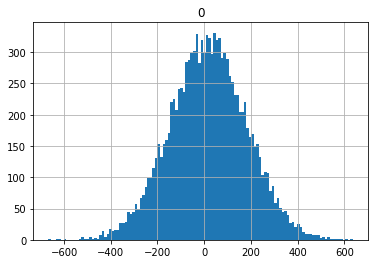

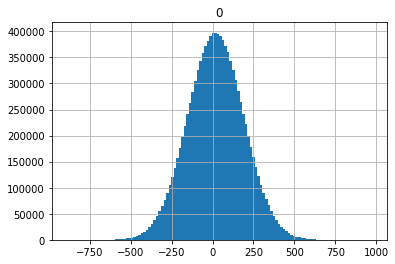

In [4]:
pd.DataFrame(population_women).hist(bins=120)
pd.DataFrame(population_men).hist(bins=120)

На графике так же видно, что данные почти не отличаются 

#### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.

In [5]:
sigma = 150
Z = 1.96
e = 50

N = ((sigma*Z)/e)**2
N

34.5744

#### 4. Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за 0.05 ?

In [6]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [7]:
oddsratio, pvalue = stats.fisher_exact(observations) 
pvalue

0.08323639416753109

Если принять уровень значимости за 0.05, то видим, что  pvalue > 0.05,  и мы не можем отвергнуть гипотезу о том, что "волшебник" умеет предсказывать погоду.

#### 5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]

In [8]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [9]:
def mean_confidence_interval(data, confidence):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h, m+h

mean_confidence_interval(data, 0.9)

(6.074074746111319, 7.183068111031539)

#### 6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [10]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [11]:
t, p  = stats.ttest_ind(data_1,data_2)
print("t = " + str(round(t, 5)))
print("p = " + str(round(p, 5)))

t = 7.35745
p = 0.0


явно видим, что можно отвергнуть нулевую гипотезу и выборки не принадлежат одной генеральной совокупности 

In [12]:
# проверим, принадлежат ли средние к одной совокупности 
mean1, mean2 = np.mean(data_1), np.mean(data_2)
mean1, mean2

(6.628571428571429, 3.967741935483871)

In [13]:
# построим доверительный интервал для малой выборки и проверим, включает ли он среднее большой выборки 
x = np.mean(data_1)
se = scipy.stats.sem(data_1)
x-2*se, x+2*se

(5.972196283298139, 7.284946573844719)

видим, что среднее большой выборки не принадлежит ДИ первой выборки - выборки не принадлежат одной генеральной совокупности 

#### 7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

#### Предположим, Вы сформировали две гипотезы: Нулевая гипотеза - распределение нормальное, Альтернативная гипотеза - распределение не нормальное.

#### Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

Если за уровень доверия мы будем принимать классические 0.05, то при p-value < 0.05, как в нашем случае,мы отвергнем нулевую гипотезу и будем считать, что распределение не нормальное 
Плюс к этому нужно графически представить данные и оценить их нормальность визуально 

#### 8. Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)
##### а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 5% или 0.05)

##### b) При каком минимальном P-values различия были бы уже значимы?

In [14]:
A = stats.norm.rvs(scale=100,loc=10,size=500)
B = A+stats.norm.rvs(scale=70,loc=4,size=500)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9d9d2e990>]],
      dtype=object)

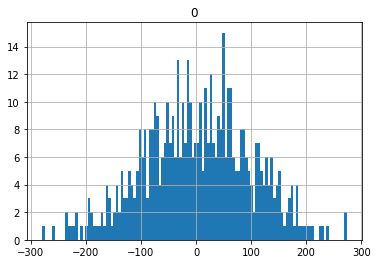

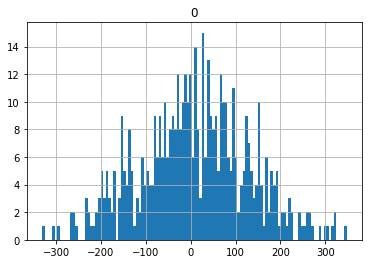

In [15]:
pd.DataFrame(A).hist(bins=120)
pd.DataFrame(B).hist(bins=120)

In [16]:
res_test = stats.ttest_rel(A,B)
res_test.pvalue

0.04286287134901662

При таком значении pvalue видим, что различия между выборками есть, но pvalue довольно близко к уровню доверия, поэтому можно предположить, что разброс возник из-за диспресии

Думаю мы могли бы предположить, что более схожими выборки станут при pvalue близкому к 0.05